<a href="https://colab.research.google.com/github/cwilbar04/nba-predictions/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
from datetime import datetime
import os

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [6]:
my_project_id = 'nba-predictions-dev'
model_table_name = 'nba.model_training_data_20210308'

In [ ]:
%env GOOGLE_APPLICATION_CREDENTIALS C:\GCP\nba-predictions-dev-d76075f0a064.json

env: GOOGLE_APPLICATION_CREDENTIALS=C:\GCP\nba-predictions-dev-d76075f0a064.json


In [ ]:
%env GOOGLE_CLOUD_PROJECT nba-predictions-dev

env: GOOGLE_CLOUD_PROJECT=nba-predictions-dev


In [ ]:
credentials = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

In [4]:
client = bigquery.Client(project=my_project_id)

In [7]:
model = client.query('''
  SELECT
    *
  FROM
    `%s`
''' % (model_table_name)).to_dataframe()

In [8]:
model.describe()

,season,SEASON_GAME_NUMBER,spread,is_home_team,incoming_is_win_streak,opponent_incoming_is_win_streak,incoming_wma_10_pace,incoming_wma_10_efg_pct,incoming_wma_10_tov_pct,incoming_wma_10_ft_rate,incoming_wma_10_off_rtg,incoming_wma_10_opponent_efg_pct,incoming_wma_10_opponent_tov_pct,incoming_wma_10_opponent_ft_rate,incoming_wma_10_opponent_off_rtg,incoming_wma_10_starter_minutes_played_proportion,incoming_wma_10_bench_plus_minus,incoming_wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_opponent_bench_plus_minus,incoming_rest_days,opponent_incoming_rest_days
count,23955.000000,23955.000000,23955.000000,23955.0,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23955.000000,23954.000000
mean,2010.222167,48.290086,3.100564,1.0,-0.016990,0.073095,92.531720,0.498536,12.877473,0.224637,107.546140,0.497712,12.874491,0.224413,107.431853,0.650612,-1.569850,0.651117,-1.845050,1.321311,1.068506
std,6.099998,22.627887,13.207259,0.0,3.276596,3.258216,4.237838,0.033103,1.586659,0.040914,5.625162,0.031772,1.641177,0.041063,5.442162,0.053010,13.190546,0.037821,12.944976,3.314609,3.051436
min,2000.000000,11.000000,-58.000000,1.0,-28.000000,-27.000000,80.623636,0.379818,6.849091,0.090455,83.049091,0.385455,7.043636,0.111127,85.647273,0.454665,-54.672727,0.485263,-59.018182,0.000000,0.000000
25%,2005.000000,29.000000,-6.000000,1.0,-2.000000,-2.000000,89.444545,0.475909,11.783636,0.195818,103.807273,0.475655,11.736364,0.195545,103.759091,0.614124,-10.145455,0.624951,-10.290909,1.000000,0.000000
50%,2010.000000,48.000000,4.000000,1.0,1.000000,1.000000,92.056364,0.497618,12.829091,0.222127,107.527273,0.497218,12.832727,0.221091,107.485455,0.650395,-1.727273,0.650867,-2.109091,1.000000,1.000000
75%,2016.000000,67.000000,12.000000,1.0,2.000000,2.000000,95.305455,0.520809,13.929091,0.250955,111.339091,0.519055,13.980000,0.250000,111.120000,0.687714,6.727273,0.676750,6.490909,2.000000,1.000000
max,2021.000000,108.000000,61.000000,1.0,25.000000,27.000000,108.165455,0.626109,20.270909,0.405655,130.705455,0.629055,21.112727,0.460545,132.240000,0.845387,62.018182,0.828849,62.327273,145.000000,144.000000


In [9]:
model.head()

,season,game_date,team,opponent,SEASON_GAME_NUMBER,game_key,spread,spread_category,is_home_team,incoming_is_win_streak,opponent_incoming_is_win_streak,incoming_wma_10_pace,incoming_wma_10_efg_pct,incoming_wma_10_tov_pct,incoming_wma_10_ft_rate,incoming_wma_10_off_rtg,incoming_wma_10_opponent_efg_pct,incoming_wma_10_opponent_tov_pct,incoming_wma_10_opponent_ft_rate,incoming_wma_10_opponent_off_rtg,incoming_wma_10_starter_minutes_played_proportion,incoming_wma_10_bench_plus_minus,incoming_wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_opponent_bench_plus_minus,incoming_rest_days,opponent_incoming_rest_days
0,2015,2014-11-16,Oklahoma City Thunder,Houston Rockets,11,HOU20141116OKC700ph,-4,L_3-4,1,-1,2,89.521818,0.485527,13.738182,0.171382,101.798182,0.481018,11.165455,0.178491,104.107273,0.677496,-0.981818,0.637513,5.654545,1,1.0
1,2015,2014-11-16,New York Knicks,Denver Nuggets,11,DEN20141116NYK100ph,16,W_16-20,1,-7,1,88.196364,0.487400,11.398182,0.146891,106.500000,0.516909,13.169091,0.305691,112.210909,0.544670,-13.509091,0.654019,2.618182,1,1.0
2,2015,2014-11-17,Memphis Grizzlies,Houston Rockets,11,HOU20141117MEM800ph,26,W_26+,1,3,3,89.285455,0.470891,10.807273,0.280618,109.847273,0.490182,13.878182,0.182218,104.709091,0.652694,7.600000,0.643215,-11.454545,1,0.0
3,2015,2014-11-17,Charlotte Hornets,Dallas Mavericks,11,DAL20141117CHO700ph,-27,L_26+,1,-1,3,91.603636,0.472145,11.469091,0.224600,103.496364,0.507964,11.872727,0.182327,109.207273,0.588194,-0.072727,0.640703,-6.672727,1,1.0
4,2015,2014-11-17,Portland Trail Blazers,New Orleans Pelicans,11,NOP20141117POR1000ph,9,W_9-10,1,4,2,93.563636,0.524764,12.483636,0.206836,114.245455,0.452727,10.487273,0.242582,104.127273,0.653958,15.036364,0.635344,-21.563636,1,2.0


In [10]:
model.columns.sort_values()

Index(['SEASON_GAME_NUMBER', 'game_date', 'game_key', 'incoming_is_win_streak',
       'incoming_rest_days', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'is_home_team', 'opponent',
       'opponent_incoming_is_win_streak', 'opponent_incoming_rest_days',
       'season', 'spread', 'spread_category', 'team'],
      dtype='object')

In [ ]:
model.loc[x,'game_date'].strftime('%m-%d')

AttributeError: 'Series' object has no attribute 'strftime'

In [ ]:
for x in range(len(model)):
    model.loc[x,'month'] = model.loc[x,'game_date'].month
    model.loc[x,'month-day'] = model.loc[x,'game_date'].strftime('%m-%d')

In [26]:
model_included = model[['spread', 'incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'incoming_rest_days', 'opponent_incoming_rest_days']]

In [27]:
model_included['rest_days_difference'] = model_included['incoming_rest_days'] - model_included['opponent_incoming_rest_days']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
model_included.drop(columns=['incoming_rest_days', 'opponent_incoming_rest_days'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
model_included.head()

,spread,incoming_is_win_streak,incoming_wma_10_bench_plus_minus,incoming_wma_10_efg_pct,incoming_wma_10_ft_rate,incoming_wma_10_off_rtg,incoming_wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_efg_pct,incoming_wma_10_opponent_ft_rate,incoming_wma_10_opponent_off_rtg,incoming_wma_10_opponent_tov_pct,incoming_wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_pace,incoming_wma_10_starter_minutes_played_proportion,incoming_wma_10_tov_pct,rest_days_difference
0,-4,-1,-0.981818,0.485527,0.171382,101.798182,5.654545,0.481018,0.178491,104.107273,11.165455,0.637513,89.521818,0.677496,13.738182,0.0
1,16,-7,-13.509091,0.487400,0.146891,106.500000,2.618182,0.516909,0.305691,112.210909,13.169091,0.654019,88.196364,0.544670,11.398182,0.0
2,26,3,7.600000,0.470891,0.280618,109.847273,-11.454545,0.490182,0.182218,104.709091,13.878182,0.643215,89.285455,0.652694,10.807273,1.0
3,-27,-1,-0.072727,0.472145,0.224600,103.496364,-6.672727,0.507964,0.182327,109.207273,11.872727,0.640703,91.603636,0.588194,11.469091,0.0
4,9,4,15.036364,0.524764,0.206836,114.245455,-21.563636,0.452727,0.242582,104.127273,10.487273,0.635344,93.563636,0.653958,12.483636,-1.0


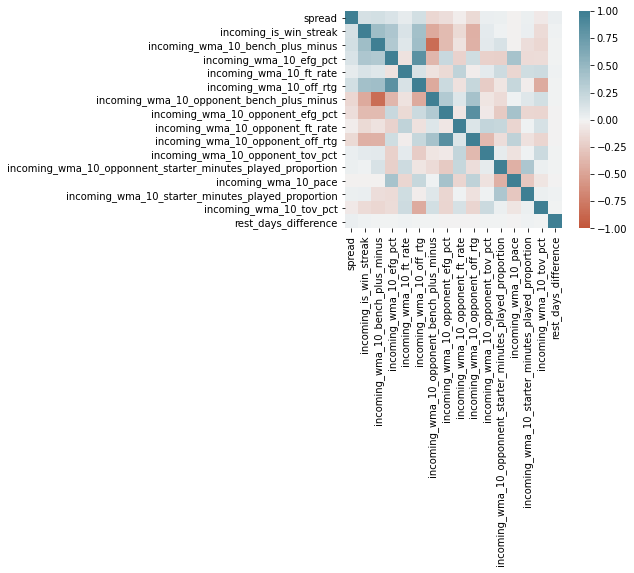

In [31]:
corr = model_included.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']


NameError: ignored

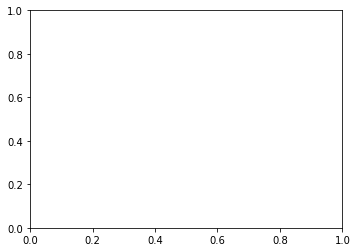

In [21]:
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]


plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

ax.scatter(
    x=x.map(x_to_num), # Use mapping for x
    y=y.map(y_to_num), # Use mapping for y
    s=size * size_scale, # Vector of square sizes, proportional to size parameter
    c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
    marker='s' # Use square as scatterplot marker
)
# ...

# Add color legend on the right side of the plot
ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

col_x = [0]*len(palette) # Fixed x coordinate for the bars
bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

bar_height = bar_y[1] - bar_y[0]
ax.barh(
    y=bar_y,
    width=[5]*len(palette), # Make bars 5 units wide
    left=col_x, # Make bars start at 0
    height=bar_height,
    color=palette,
    linewidth=0
)
ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
ax.grid(False) # Hide grid
ax.set_facecolor('white') # Make background white
ax.set_xticks([]) # Remove horizontal ticks
ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
ax.yaxis.tick_right() # Show vertical ticks on the right 

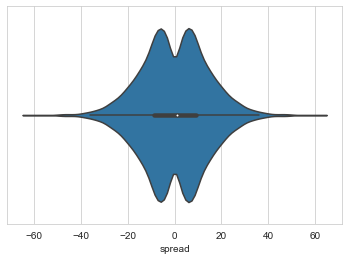

In [ ]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=model_included, x='spread', inner='box', orient='h')

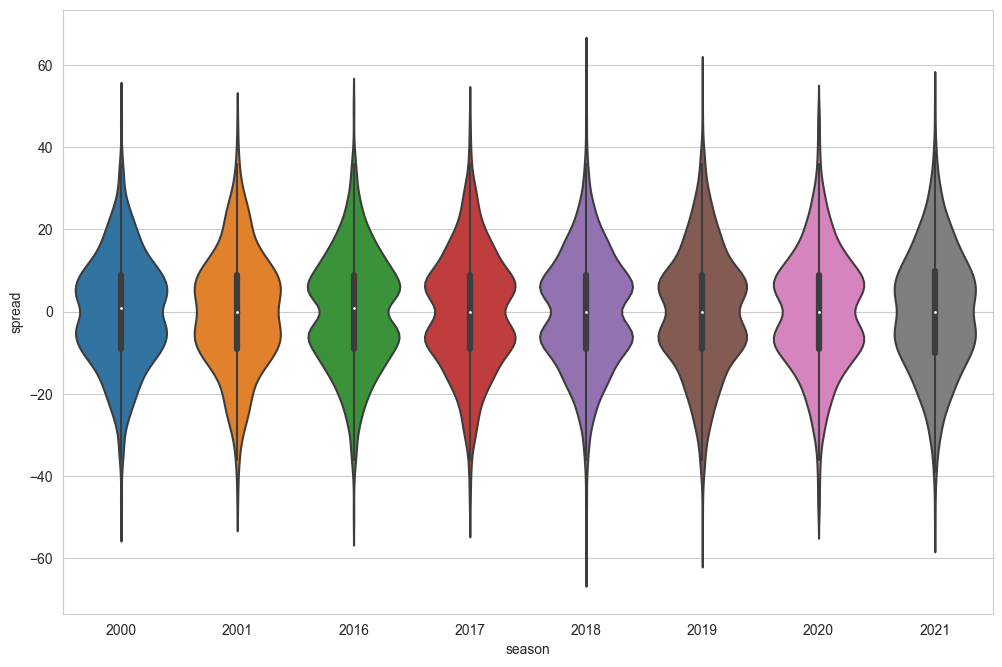

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100)
ax = sns.violinplot(data=model, x='season', y='spread', inner='box', orient='v')

No noticeable differences in spread between seasons

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

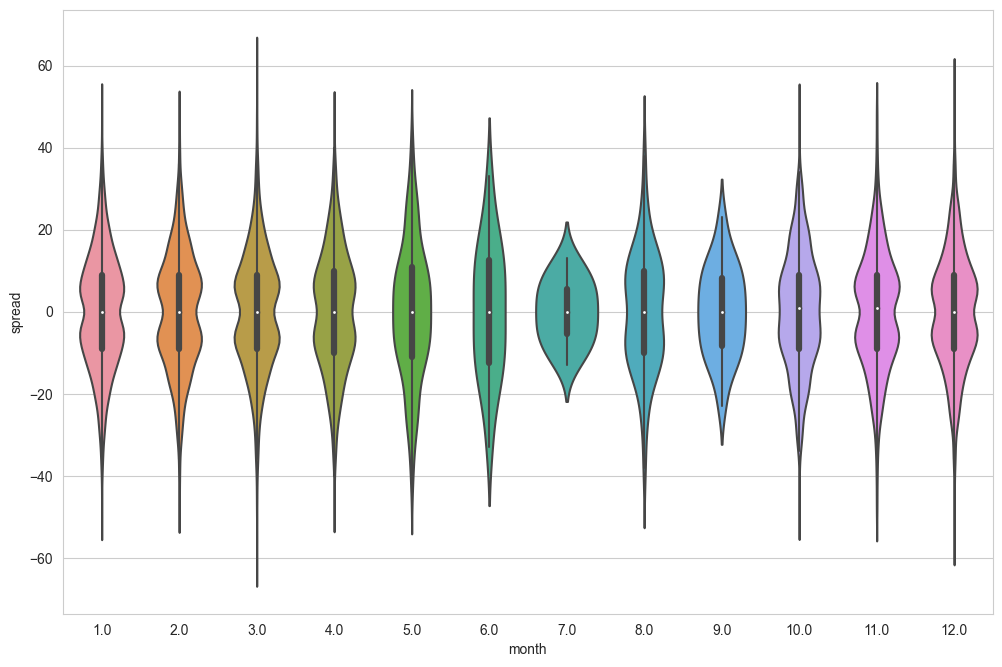

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100)
ax = sns.violinplot(data=model, x='month', y='spread', inner='box', orient='v')

No noticeable difference in spread between months, except perhaps July but there are just significantly less games in July since that is not usually an NBA month

In [ ]:
model['spread'].value_counts().tail(30)

-38    14
-37    14
-46     7
 47     7
-47     7
 46     7
-40     6
-42     6
 40     6
 42     6
 48     5
-48     5
 41     4
 49     4
-45     4
-43     4
-44     4
 43     4
-49     4
 45     4
-41     4
 44     4
 50     3
-51     2
-50     2
 51     2
-61     1
-56     1
 56     1
 61     1
Name: spread, dtype: int64

In [ ]:
# Consider excluding from our data any spread that occurs less than 370 times (3 sigma) or 22 times (2 sigma) rules, representing outliers - almost all rare blow out games
# counts = model_included['spread'].value_counts()
# model_included = model_included.loc[model_included['spread'].isin(counts[counts > 5].index), :]

In [ ]:
# # rewrite SQL query for getting data 
# model_included['spread'].value_counts()

 7     538
-7     535
 5     530
-5     529
 8     527
      ... 
 47      7
 42      6
 40      6
-40      6
-42      6
Name: spread, Length: 86, dtype: int64

In [ ]:

# model = client.query('''
#   SELECT
#     spread, incoming_is_win_streak, incoming_wma_10_bench_plus_minus,
#        incoming_wma_10_efg_pct, incoming_wma_10_ft_rate,
#        incoming_wma_10_off_rtg, incoming_wma_10_opponent_bench_plus_minus,
#        incoming_wma_10_opponent_efg_pct, incoming_wma_10_opponent_ft_rate,
#        incoming_wma_10_opponent_off_rtg, incoming_wma_10_opponent_tov_pct,
#        incoming_wma_10_opponnent_starter_minutes_played_proportion,
#        incoming_wma_10_pace,
#        incoming_wma_10_starter_minutes_played_proportion,
#        incoming_wma_10_tov_pct, is_home_team
#   FROM
#     `%s`
#   WHERE spread in 
#       (SELECT distinct spread FROM `%s` GROUP BY spread HAVING count(1) > 5) 
# ''' % (model_table_name,model_table_name)).to_dataframe()

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 50 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   game_key                                                     16712 non-null  object 
 1   season                                                       16712 non-null  int64  
 2   game_date                                                    16712 non-null  object 
 3   team                                                         16712 non-null  object 
 4   opponent                                                     16712 non-null  object 
 5   is_home_team                                                 16712 non-null  int64  
 6   spread                                                       16712 non-null  int64  
 7   pace                                                         16712 non-null 

In [ ]:
model_included.drop(columns='spread')

,month,incoming_is_win_streak,incoming_wma_10_bench_plus_minus,incoming_wma_10_efg_pct,incoming_wma_10_ft_rate,incoming_wma_10_off_rtg,incoming_wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_efg_pct,incoming_wma_10_opponent_ft_rate,incoming_wma_10_opponent_off_rtg,incoming_wma_10_opponent_tov_pct,incoming_wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_pace,incoming_wma_10_starter_minutes_played_proportion,incoming_wma_10_tov_pct,is_home_team
0,4.0,1.0,1.527273,0.498382,0.247073,106.952727,-3.963636,0.463382,0.237164,103.514545,13.720000,0.564633,91.680000,0.570271,13.585455,0
1,4.0,2.0,5.927273,0.462982,0.206400,101.954545,-20.509091,0.483909,0.181945,101.389091,12.456364,0.684604,96.772727,0.604949,11.178182,0
2,4.0,-2.0,-19.527273,0.475273,0.184309,98.260000,-1.309091,0.470382,0.185273,99.354545,12.772727,0.641633,98.578182,0.685989,13.327273,1
3,4.0,-1.0,12.454545,0.474673,0.227127,107.901818,-16.254545,0.476218,0.242382,103.954545,11.905455,0.595895,90.167273,0.591151,12.341818,1
4,11.0,-2.0,3.236364,0.459691,0.183127,101.100000,-7.927273,0.495673,0.196673,105.609091,12.861818,0.612428,92.956364,0.586230,12.354545,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,1.0,1.0,6.090909,0.531091,0.150964,113.203636,-15.618182,0.509891,0.237818,107.638182,13.236364,0.648320,100.530909,0.647222,11.432727,1
16708,4.0,-1.0,-16.127273,0.498709,0.176964,104.800000,6.600000,0.509873,0.209727,110.452727,11.201818,0.575330,97.196364,0.526843,12.249091,0
16709,4.0,17.0,30.818182,0.567364,0.157582,119.483636,-51.272727,0.503018,0.189000,102.081818,13.443636,0.543438,102.523636,0.556115,10.670909,1
16710,4.0,1.0,-4.200000,0.546618,0.168491,109.430909,-17.418182,0.531818,0.172327,111.372727,11.750909,0.603843,98.034545,0.609212,13.380000,1


In [37]:
model_included_20 = model_included[model_included['spread']<=20]

In [41]:
model_included.columns

Index(['spread', 'incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'rest_days_difference'],
      dtype='object')

In [45]:
model_included_less_columns = model_included_20[['spread', 'incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'rest_days_difference']]

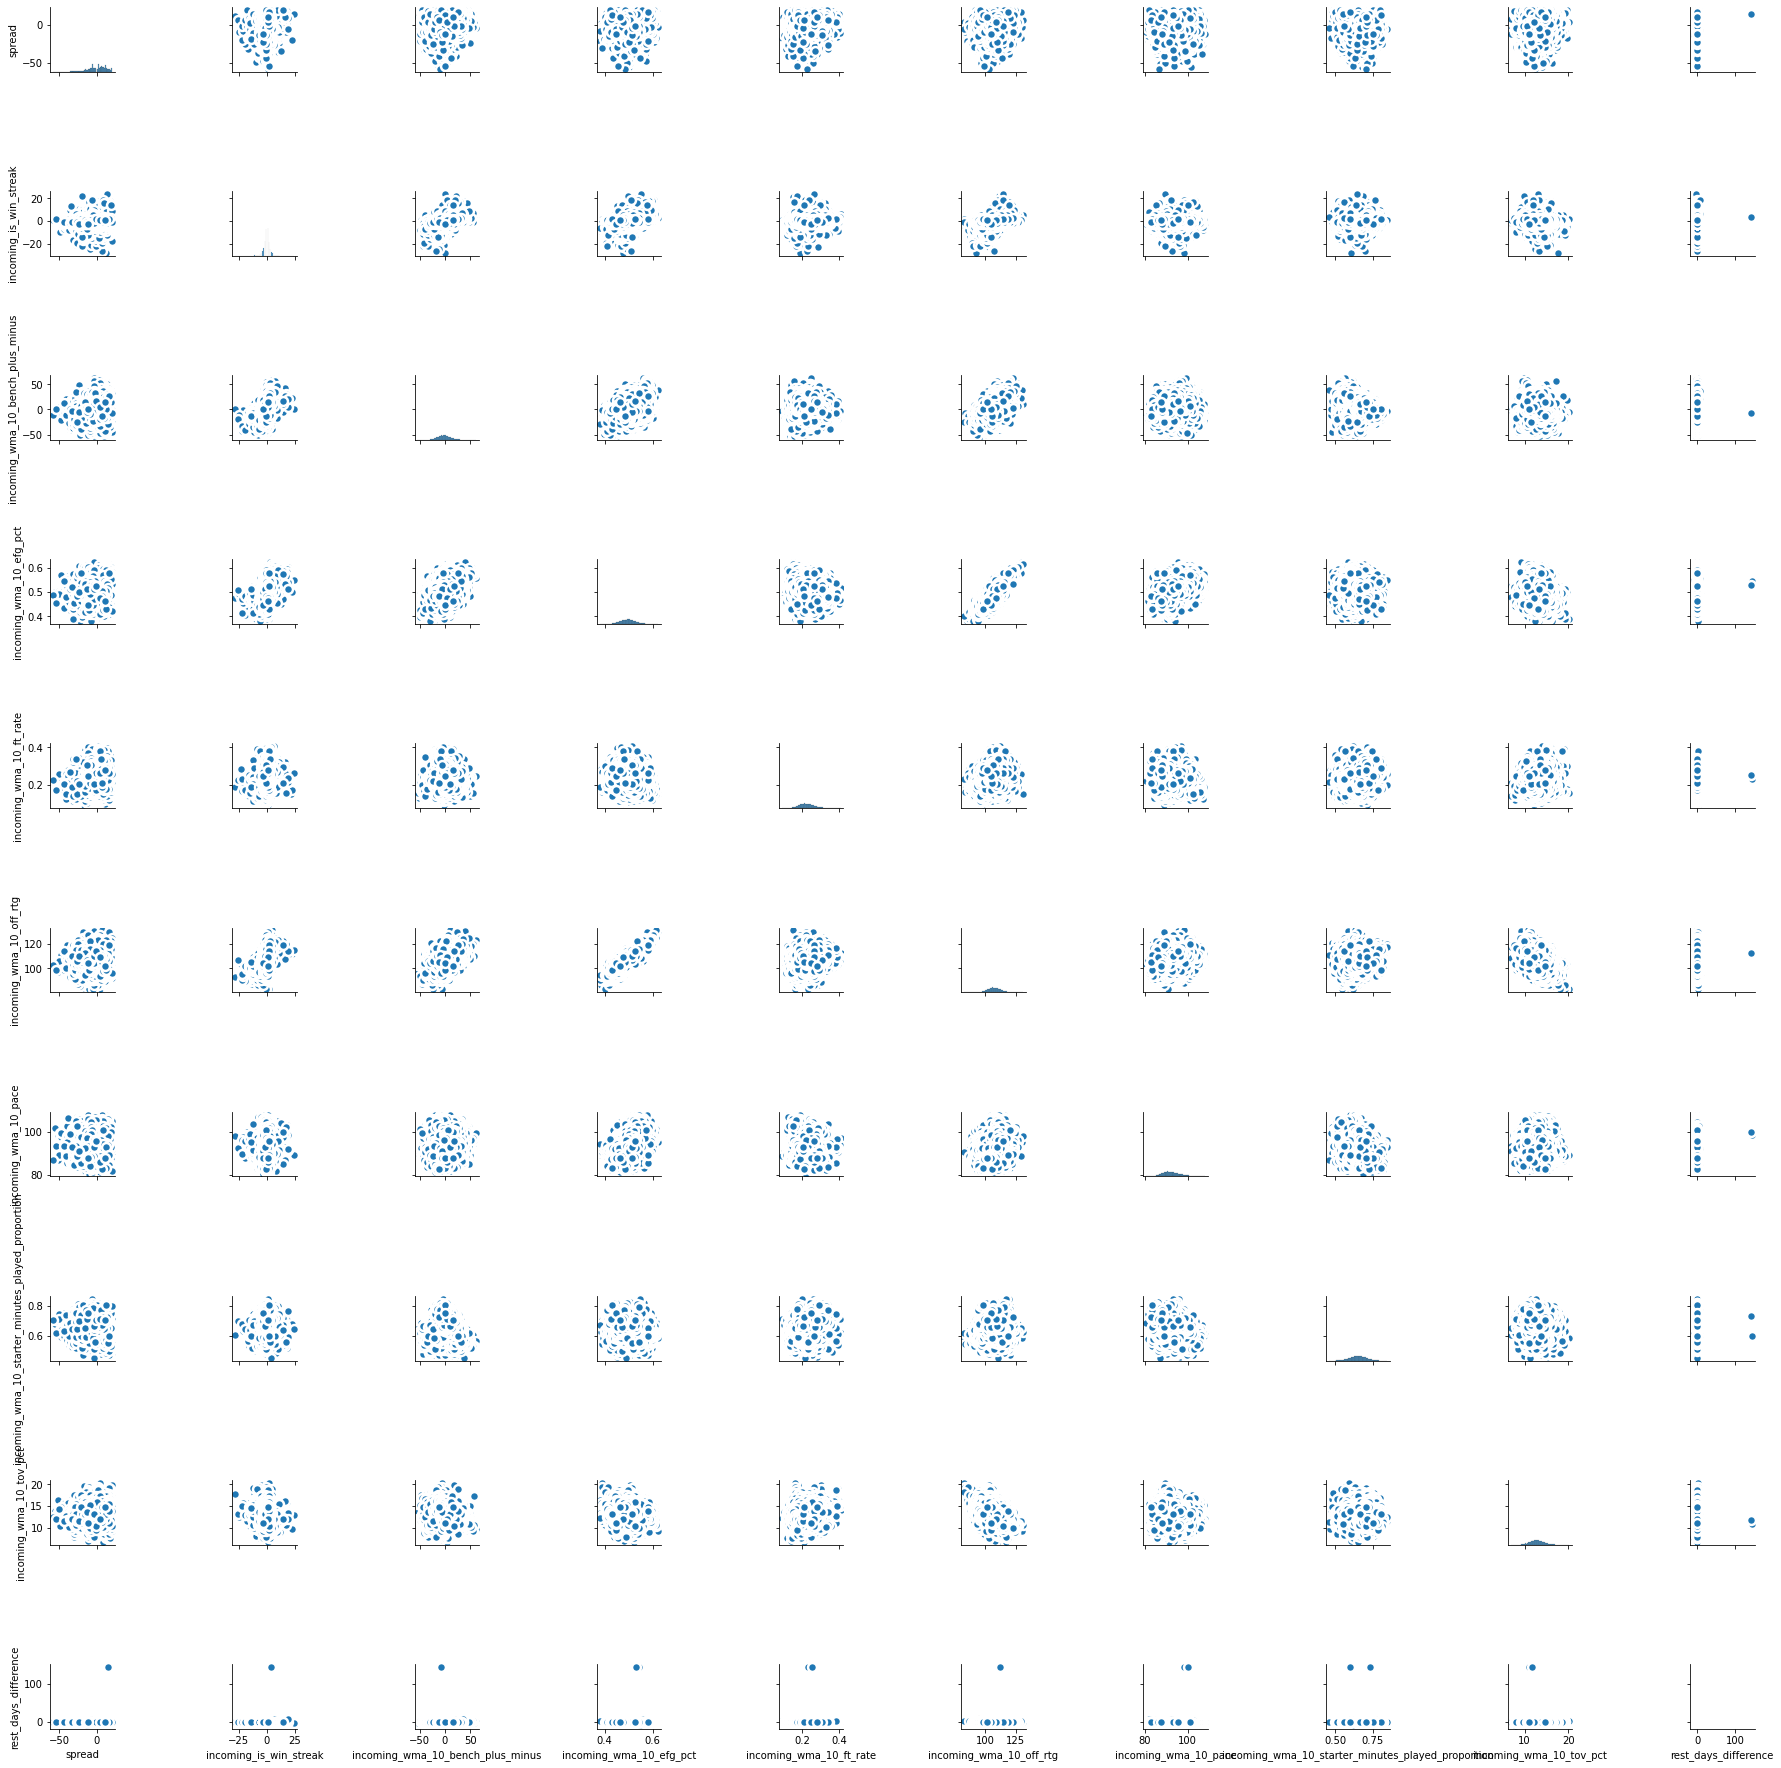

In [46]:
sns.pairplot(model_included_less_columns, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 1440x720 with 0 Axes>

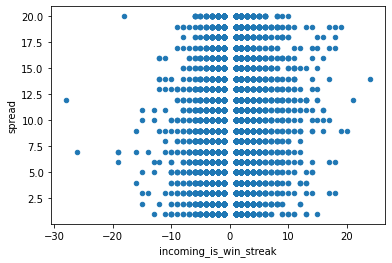

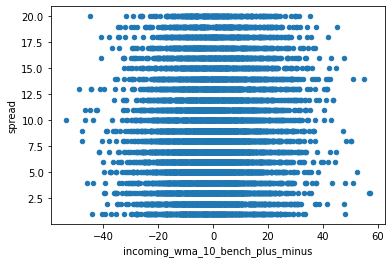

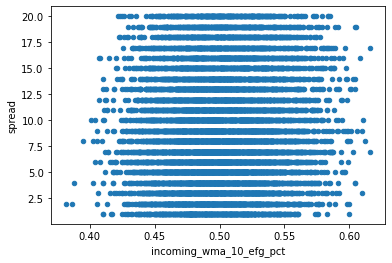

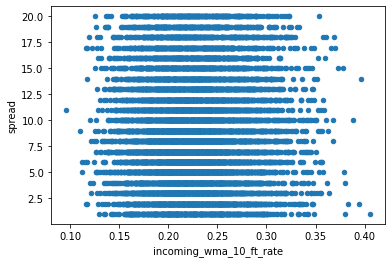

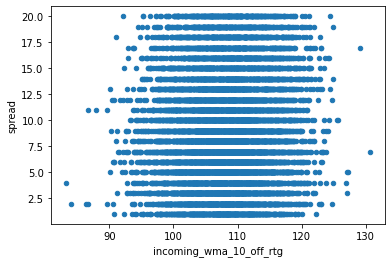

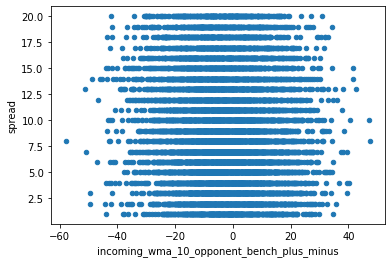

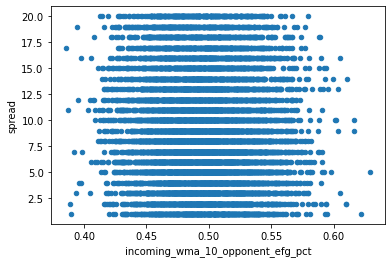

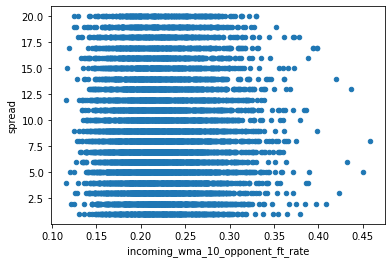

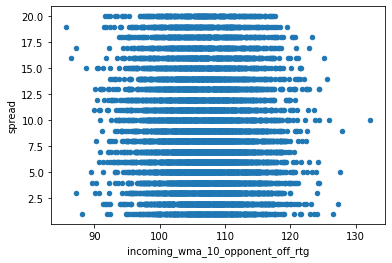

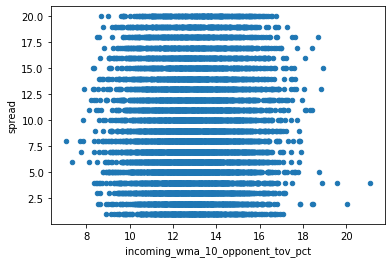

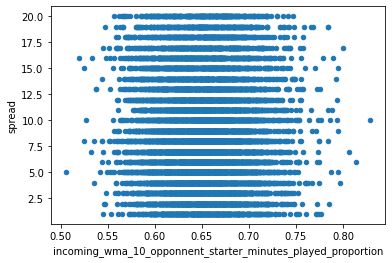

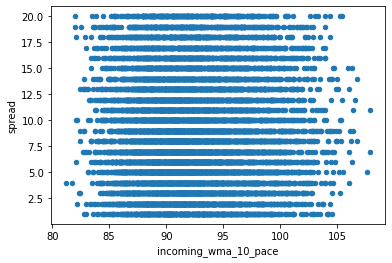

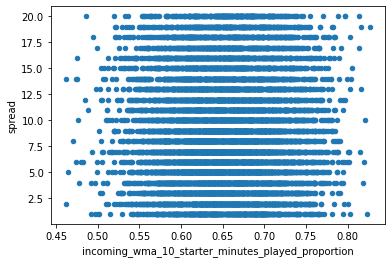

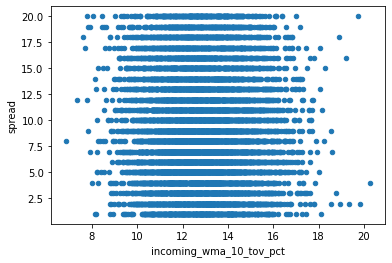

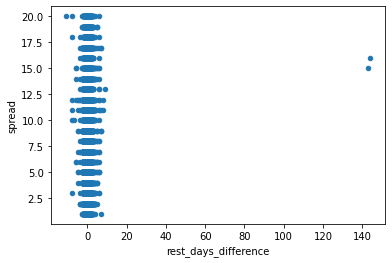

In [38]:
plt.figure(figsize=(20,10))
columns = 4
for col in model_included_20.drop(columns='spread'):
    new_model = model_included_20[model_included_20['spread']>0].sort_values(by = col)
    ax = new_model.plot(kind='scatter', x=col, y='spread')

In [ ]:
## Check distribution of number of games per day
model['month-day'].value_counts()

12-23    168
02-06    144
02-08    142
02-01    142
11-25    136
        ... 
09-30      2
06-06      2
09-12      2
06-14      2
09-27      2
Name: month-day, Length: 298, dtype: int64

In [ ]:
model['month-day']

0        30.0
1        30.0
2        30.0
3        30.0
4        36.0
         ... 
16707     7.0
16708    20.0
16709    20.0
16710    20.0
16711    20.0
Name: month-day, Length: 16712, dtype: float64

In [ ]:
## Choose to split train/test by date
## Create table with random 70% of days in data set